In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.insert(0, '../../')
sys.path

['../../',
 '../../',
 '',
 '/content/drive/MyDrive/papers/human-gait-analysis/gait/notebooks',
 '/root/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.1195043623/pythonFiles',
 '/root/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.1195043623/pythonFiles/lib/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [9]:
%matplotlib inline 
from gait.config import Config
import os
import random
from dataclasses import asdict
config_dict = asdict(Config())
subject = 9
surface = 'StrD'
sensor_loc = 'LeftThigh'
cols = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X',
                     'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']
filename = os.path.join('/content/input_data', str(subject), str(random.choice(config_dict['SURFACE_TRIALS'][surface])) + '-000_00B432' + config_dict['SENSOR_LOCS'][sensor_loc] + '.txt.csv')
print(filename)
df = pd.read_csv(filename, usecols=cols,
                skipinitialspace=True, engine='c')


std_df = (df - df.mean())/ df.std()



/content/input_data/9/23-000_00B4328B.txt.csv


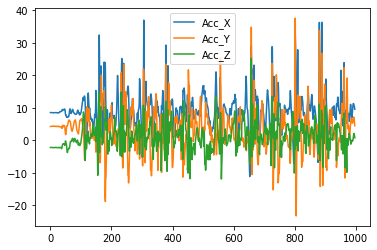

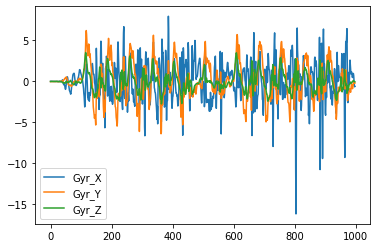

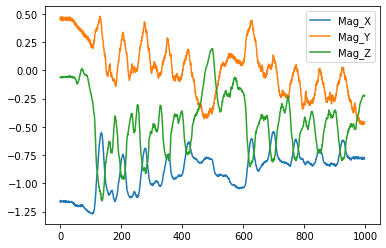

In [10]:
# Acc
df[cols[:3]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_acc.png', dpi = 1500)
plt.show()

# Gyr
df[cols[3:6]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_gyr.png', dpi = 1500)
plt.show()

# Mag
df[cols[6:9]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_mag.png', dpi = 1500)
plt.show()

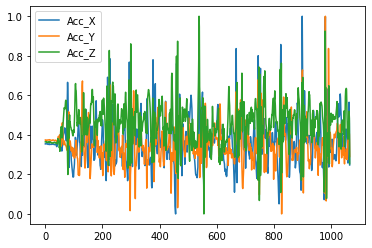

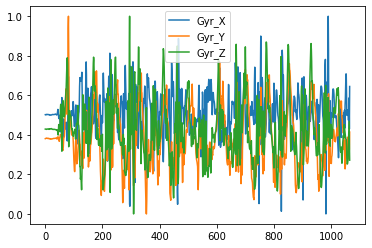

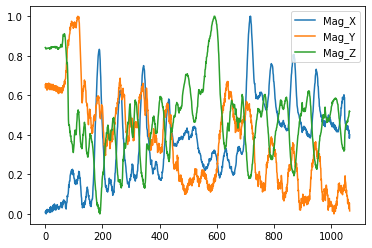

In [23]:
# Norm
norm_df = (df - df.min())/(df.max() - df.min())

# Acc
norm_df[cols[:3]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_acc_norm.png', dpi = 1500)
plt.show()

# Gyr
norm_df[cols[3:6]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_gyr_norm.png', dpi = 1500)
plt.show()

# Mag
norm_df[cols[6:9]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_mag_norm.png', dpi = 1500)
plt.show()

In [ ]:
# Std
std_df = (df - df.mean())/ df.std()

# Acc
std_df[cols[:3]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_acc_std.png', dpi = 1500)
plt.show()

# Gyr
std_df[cols[3:6]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_gyr_std.png', dpi = 1500)
plt.show()


# Mag
std_df[cols[6:9]].plot()
plt.savefig(f'{subject}_{surface}_{sensor_loc}_mag_std.png', dpi = 1500)
plt.show()

In [21]:
kernel_size = 5
dilation = 2
stride = 2
padding = 0
Lin = 28
def output_cnn_dim():
    return ((Lin + 2*padding - dilation * (kernel_size-1)-1)/stride) + 1

print(output_cnn_dim())

10.5


In [22]:
kernel_size = 2
dilation = 1
stride = 1
padding = 0
Lin = 10
def output_cnn_dim():
    return ((Lin + 2*padding - dilation * (kernel_size-1)-1)/stride) + 1

print(output_cnn_dim())

9.0


# Check scaling methods

In [12]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
import pandas as pd
import numpy as np

# add human-gait-analysis to path
import sys
sys.path.insert(0, '../../')
sys.path

['../../',
 '../../',
 '../../',
 '',
 '/content/drive/MyDrive/papers/human-gait-analysis/gait/notebooks',
 '/root/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.1195043623/pythonFiles',
 '/root/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.1195043623/pythonFiles/lib/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
%matplotlib inline 
from gait.config import Config, Flags
from gait.read_data import ReadData
import os
import random
from dataclasses import asdict
config_dict = asdict(Config())
FLAGS = asdict(Flags('S'))

data = ReadData()._init_data()

std_df = (df - df.mean())/ df.std()

